## Train sea lion classifier with a convnet

In [1]:
INPUT_DIR = '../../output/kaggle-sea-lion/02/'
OUTPUT_DIR = '../../output/kaggle-sea-lion/03/'
IMAGE_DIMS = (148,148,3)

MODEL_FILE = OUTPUT_DIR + 'sea-lion-classifier'

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import sklearn
import os
import glob

from modules.logging import logger
import modules.utils as utils
from modules.utils import Timer
import modules.logging
import modules.cnn as cnn
import modules.lions as lions

Using TensorFlow backend.


## Training

### Prepare output dir

In [3]:
utils.mkdirs(OUTPUT_DIR, recreate=False)
modules.logging.setup_file_logger(OUTPUT_DIR + 'out.log')
logger.info('Dir ' + OUTPUT_DIR + ' created')

load_model_file = None
if(os.path.isfile(MODEL_FILE + '.index')):
    load_model_file = MODEL_FILE
    logger.info('Found previous model file. It will be loaded on cnn network as its initial state. ' + load_model_file)

2017-04-03 01:12:01,022 INFO Dir ../../output/kaggle-sea-lion/03/ created
2017-04-03 01:12:01,024 INFO Found previous model file. It will be loaded on cnn network as its initial state. ../../output/kaggle-sea-lion/03/sea-lion-classifier


### Prepare CNN model

In [4]:
logger.info('Prepare CNN for training')
network = lions.convnet_alexnet_lion(IMAGE_DIMS)
model = cnn.prepare_cnn_model(network, OUTPUT_DIR, model_file=load_model_file)

2017-04-03 01:12:01,039 INFO Prepare CNN for training
2017-04-03 01:12:01,226 INFO Prepare CNN
2017-04-03 01:12:01,227 INFO Preparing output dir
2017-04-03 01:12:01,229 INFO Initializing network...
2017-04-03 01:12:03,764 INFO Network initialized
2017-04-03 01:12:03,765 INFO Load previous training...
2017-04-03 01:12:06,333 INFO Model loaded


### Train model

In [5]:
dataset_path = INPUT_DIR + utils.dataset_name('lion-patches', IMAGE_DIMS)

with h5py.File(dataset_path, 'r') as hdf5:
    X,Y = utils.dataset_xy_range(hdf5, 0, 0.9)
    logger.info('X shape ' + str(X.shape))
    logger.info('Y shape ' + str(Y.shape))

    logger.info('Starting CNN training...')
    model.fit(X, Y, 
        validation_set=0.2,
        shuffle=True, 
        batch_size=96, 
        n_epoch=10,
        show_metric=True,
        snapshot_epoch=False,
        run_id='sea_lion_classifier')

model.save(MODEL_FILE)
logger.info("Network trained and saved as " + MODEL_FILE)

Training Step: 29  | total loss: 1.60029 | time: 32.292s
| Momentum | epoch: 010 | loss: 1.60029 - acc: 0.3534 -- iter: 192/216
Training Step: 30  | total loss: 1.54722 | time: 58.554s
| Momentum | epoch: 010 | loss: 1.54722 - acc: 0.3659 | val_loss: 1.44306 - val_acc: 0.5370 -- iter: 216/216
--
INFO:tensorflow:/notebooks/output/kaggle-sea-lion/03/tf-checkpoint-best5370 is not in all_model_checkpoint_paths. Manually adding it.


2017-04-03 00:54:07,168 INFO /notebooks/output/kaggle-sea-lion/03/tf-checkpoint-best5370 is not in all_model_checkpoint_paths. Manually adding it.


INFO:tensorflow:/notebooks/output/kaggle-sea-lion/03/sea-lion-classifier is not in all_model_checkpoint_paths. Manually adding it.


2017-04-03 00:54:14,543 INFO /notebooks/output/kaggle-sea-lion/03/sea-lion-classifier is not in all_model_checkpoint_paths. Manually adding it.
2017-04-03 00:54:14,670 INFO Network trained and saved as ../../output/kaggle-sea-lion/03/sea-lion-classifier


### Evaluate results

2017-04-03 01:12:11,372 INFO Evaluate dataset
2017-04-03 01:12:13,403 INFO Accuracy: [0.70000001192092898]
2017-04-03 01:12:15,270 INFO Nr test samples: 30
2017-04-03 01:12:15,272 INFO Kappa score (was this luck?): -0.125
2017-04-03 01:12:15,274 INFO Confusion matrix:
2017-04-03 01:12:15,275 INFO [[ 0  2  0  0]
 [ 4 18  0  0]
 [ 0  3  0  0]
 [ 0  3  0  0]]


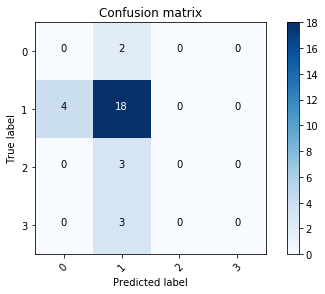

In [5]:
logger.info('Evaluate dataset')
dataset_path = INPUT_DIR + utils.dataset_name('lion-patches', IMAGE_DIMS)

with h5py.File(dataset_path, 'r') as hdf5:
    X,Y = utils.dataset_xy_range(hdf5, 0.9, 1)
    cnn.evaluate_dataset(X, Y, model, batch_size=24, detailed=True)